# Mushroom Classification

### Dataset

https://www.kaggle.com/datasets/uciml/mushroom-classification

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
dataset = pd.read_csv("mushrooms.csv")

In [3]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Data preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
for column in dataset.columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])

In [7]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [8]:
y = dataset["class"]
dataset.drop("class", axis=1, inplace=True)

In [9]:
print("edible(0) sınıfına ait veri sayısı =", y[y==0].count())
print("poisonous(1) sınıfına ait veri sayısı =", y[y==1].count())

edible(0) sınıfına ait veri sayısı = 4208
poisonous(1) sınıfına ait veri sayısı = 3916


In [10]:
X = dataset.values
y = y.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [12]:
print("Eğitim verileri =", X_train.shape)
print("Eğitim etiketleri =", y_train.shape)
print("Test verileri =", X_test.shape)
print("Test etiketleri =", y_test.shape)

Eğitim verileri = (5686, 22)
Eğitim etiketleri = (5686,)
Test verileri = (2438, 22)
Test etiketleri = (2438,)


In [13]:
print("Eğitim için edible(0) sınıfına ait veri sayısı =", len(y_train[y_train==0]))
print("Eğitim için poisonous(1) sınıfına ait veri sayısı =", len(y_train[y_train==1]))
print("Test için edible(0) sınıfına ait veri sayısı =", len(y_test[y_test==0]))
print("Test için poisonous(1) sınıfına ait veri sayısı =", len(y_test[y_test==1]))

Eğitim için edible(0) sınıfına ait veri sayısı = 2963
Eğitim için poisonous(1) sınıfına ait veri sayısı = 2723
Test için edible(0) sınıfına ait veri sayısı = 1245
Test için poisonous(1) sınıfına ait veri sayısı = 1193


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Finding the best parameters for machine learning algorithms

In [15]:
template = "{}  -  Accuracy:{:.4}  -  Recall:{:.4}  -  Precision:{:.4}  -  F1 Score:{:.4}"
all_best_models = []
all_best_params = []

In [16]:
def comparison_among_themselves(params, func_param, algorithms):
    models = []
    for i in range(len(algorithms)):
        model = algorithms[i]
        model.fit(X_train, y_train)
        models.append(model)

    for i in range(len(models)):
        print(func_param, params[i])
        y_pred = models[i].predict(X_test)
        print(template.format(confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)))
        print()
        print("----------------------------------------------------------------------------------------------")
        print()
        gecici_score = accuracy_score(y_test, y_pred)
        if i == 0:
            best_score = accuracy_score(y_test, y_pred)
            best_model = models[i] 
            best_param = params[i]
        if gecici_score>best_score:
            best_score = gecici_score
            best_model = models[i] 
            best_param = params[i]
    return best_model, best_param

### Decision Tree Classifier

In [17]:
algorithms=[]
params = ["gini", "entropy"]
func_param="criterion ="
for param in params:
    model = DecisionTreeClassifier(criterion = param, random_state = 0)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

criterion = gini
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

criterion = entropy
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------



### K-Nearest Neighbors (K-NN)

In [18]:
algorithms=[]
params = [1, 5, 10, 25]
func_param="n_neighbors ="
for param in params:
    model = KNeighborsClassifier(n_neighbors = param)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

n_neighbors = 1
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_neighbors = 5
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_neighbors = 10
[[1245    0]
 [   2 1191]]  -  Accuracy:0.9992  -  Recall:0.9983  -  Precision:1.0  -  F1 Score:0.9992

----------------------------------------------------------------------------------------------

n_neighbors = 25
[[1244    1]
 [  12 1181]]  -  Accuracy:0.9947  -  Recall:0.9899  -  Precision:0.9992  -  F1 Score:0.9945

----------------------------------------------------------------------------------------------



### Gradient Boosting Classifier

In [19]:
algorithms=[]
params = [10, 100, 500, 1000]
func_param="n_estimators ="
for param in params:
    model = GradientBoostingClassifier(n_estimators=param, learning_rate=0.1, max_depth=1, random_state=0)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

n_estimators = 10
[[1178   67]
 [ 112 1081]]  -  Accuracy:0.9266  -  Recall:0.9061  -  Precision:0.9416  -  F1 Score:0.9235

----------------------------------------------------------------------------------------------

n_estimators = 100
[[1242    3]
 [  30 1163]]  -  Accuracy:0.9865  -  Recall:0.9749  -  Precision:0.9974  -  F1 Score:0.986

----------------------------------------------------------------------------------------------

n_estimators = 500
[[1245    0]
 [   2 1191]]  -  Accuracy:0.9992  -  Recall:0.9983  -  Precision:1.0  -  F1 Score:0.9992

----------------------------------------------------------------------------------------------

n_estimators = 1000
[[1245    0]
 [   1 1192]]  -  Accuracy:0.9996  -  Recall:0.9992  -  Precision:1.0  -  F1 Score:0.9996

----------------------------------------------------------------------------------------------



### AdaBoost Classifier

In [20]:
algorithms=[]
params = [10, 100, 500, 1000]
func_param="n_estimators ="
for param in params:
    model = AdaBoostClassifier(n_estimators=param, learning_rate=0.1, random_state=0)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

n_estimators = 10
[[1200   45]
 [ 156 1037]]  -  Accuracy:0.9176  -  Recall:0.8692  -  Precision:0.9584  -  F1 Score:0.9116

----------------------------------------------------------------------------------------------

n_estimators = 100
[[1245    0]
 [  30 1163]]  -  Accuracy:0.9877  -  Recall:0.9749  -  Precision:1.0  -  F1 Score:0.9873

----------------------------------------------------------------------------------------------

n_estimators = 500
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_estimators = 1000
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------



### Support Vector Machines (SVM)

In [21]:
algorithms=[]
params = ["linear", "poly", "rbf", "sigmoid"]
func_param="kernel ="
for param in params:
    model = SVC(kernel = param, random_state = 0)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

kernel = linear
[[1220   25]
 [  26 1167]]  -  Accuracy:0.9791  -  Recall:0.9782  -  Precision:0.979  -  F1 Score:0.9786

----------------------------------------------------------------------------------------------

kernel = poly
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

kernel = rbf
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

kernel = sigmoid
[[1038  207]
 [ 196  997]]  -  Accuracy:0.8347  -  Recall:0.8357  -  Precision:0.8281  -  F1 Score:0.8319

----------------------------------------------------------------------------------------------



### Multi Layer Perceptron Classifier

In [22]:
algorithms=[]
params = [(1,), (5,), (10,), (25,)]
func_param="hidden_layer_sizes ="
for param in params:
    model = MLPClassifier(hidden_layer_sizes=param, max_iter=300)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

hidden_layer_sizes = (1,)
[[1245    0]
 [ 136 1057]]  -  Accuracy:0.9442  -  Recall:0.886  -  Precision:1.0  -  F1 Score:0.9396

----------------------------------------------------------------------------------------------

hidden_layer_sizes = (5,)
[[1232   13]
 [   0 1193]]  -  Accuracy:0.9947  -  Recall:1.0  -  Precision:0.9892  -  F1 Score:0.9946

----------------------------------------------------------------------------------------------

hidden_layer_sizes = (10,)
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

hidden_layer_sizes = (25,)
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------



### Extra-Trees Classifier

In [23]:
algorithms=[]
params = [10, 100, 500, 1000]
func_param="n_estimators ="
for param in params:
    model = ExtraTreesClassifier(n_estimators=param, random_state=0)
    algorithms.append(model)
best_model, best_param = comparison_among_themselves(params, func_param, algorithms)
all_best_models.append(best_model)
all_best_params.append(best_param)

n_estimators = 10
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_estimators = 100
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_estimators = 500
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

n_estimators = 1000
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------



## Finding the best machine learning algorithm with best parameters

In [24]:
for i in range(len(all_best_models)):
    y_pred = all_best_models[i].predict(X_test)
    print(f"{all_best_models[i]}")
    print(template.format(confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print()
    print("----------------------------------------------------------------------------------------------")
    print()

DecisionTreeClassifier(random_state=0)
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

KNeighborsClassifier(n_neighbors=1)
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=1000, random_state=0)
[[1245    0]
 [   1 1192]]  -  Accuracy:0.9996  -  Recall:0.9992  -  Precision:1.0  -  F1 Score:0.9996

----------------------------------------------------------------------------------------------

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=0)
[[1245    0]
 [   0 1193]]  -  Accuracy:1.0  -  Recall:1.0  -  Precision:1.0  -  F1 Score:1.0

----------------------------------------------------------------------------------------------

SVC(k

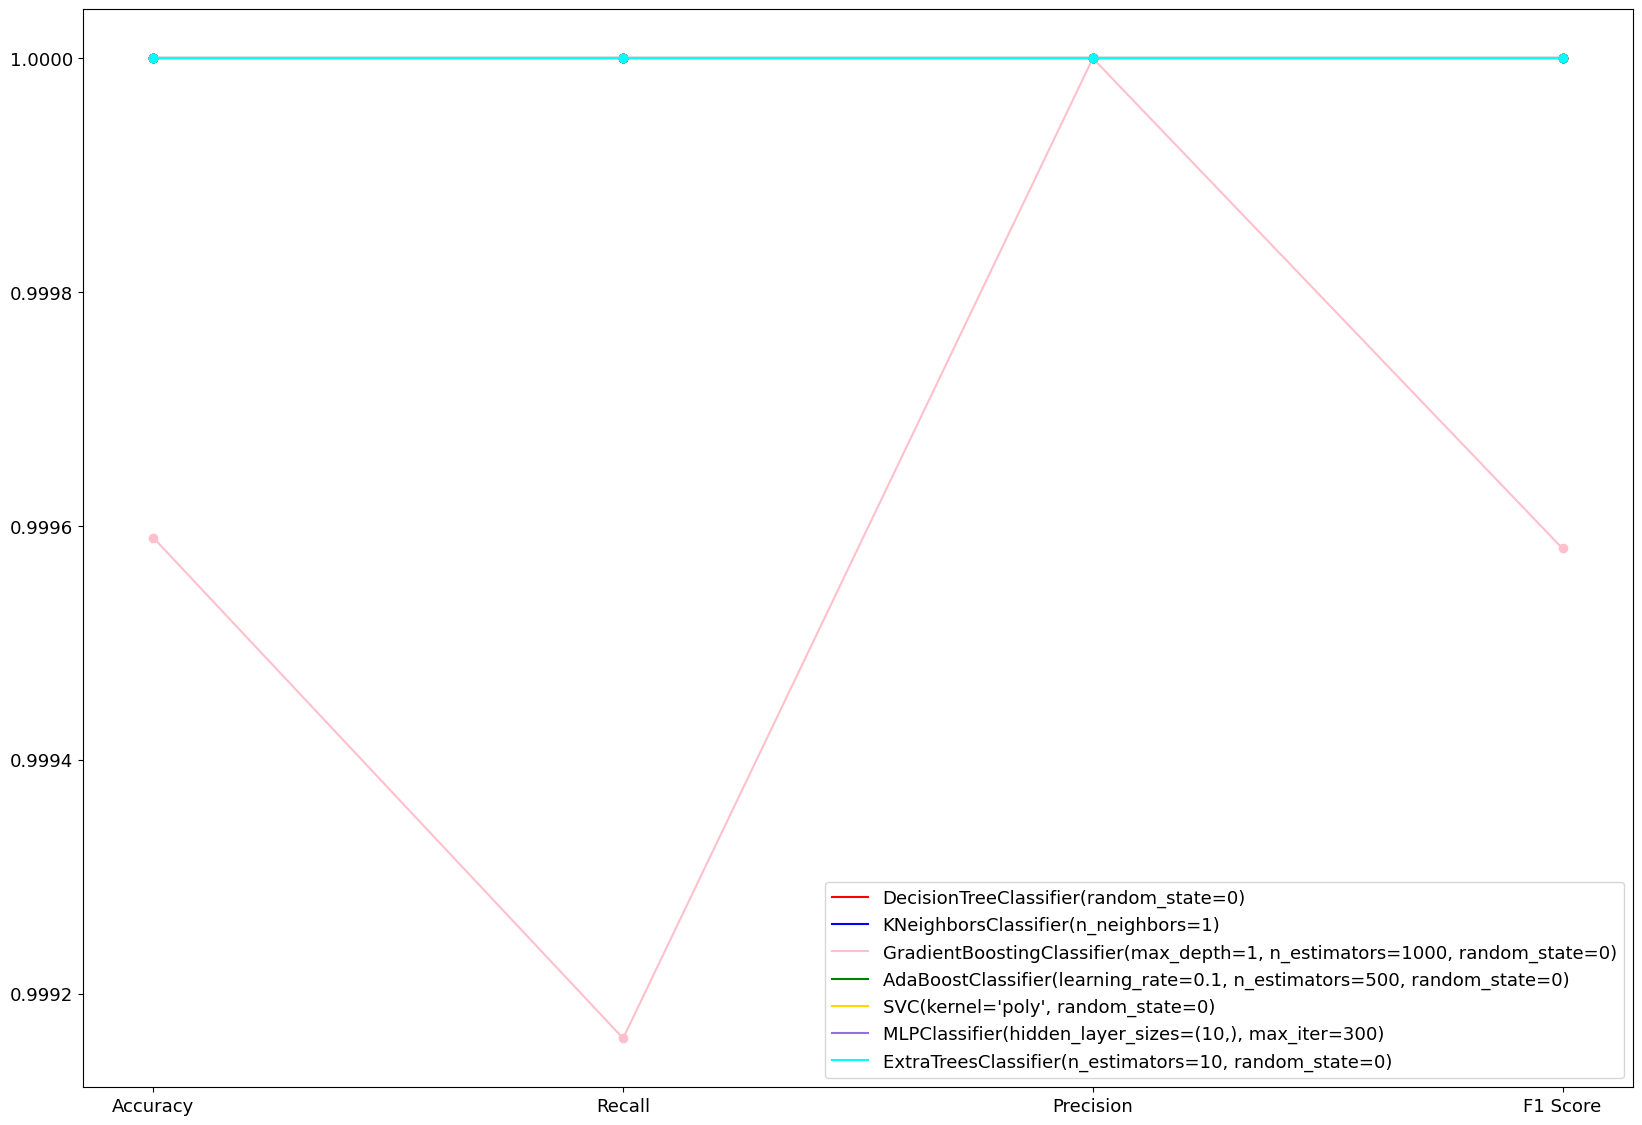

In [25]:
colors = ['red', 'blue', 'pink', 'green', 'gold', 'mediumpurple', 'cyan']
sayac=0
plt.figure(figsize=(20, 14))
plt.rcParams['font.size'] = '13'
for i in range(len(all_best_models)):
    y_pred = all_best_models[i].predict(X_test)
    plt.plot([0,1,2,3], [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)], color=colors[sayac], label= f"{all_best_models[i]}")
    plt.plot([0,1,2,3], [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)], "o", color=colors[sayac])
    plt.xticks([0,1,2,3], ["Accuracy","Recall","Precision","F1 Score"])
    plt.legend()
    sayac += 1